In [1]:
import pandas as pd

file_path = 'heartv1.csv'
df = pd.read_csv(file_path)

df.head()

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,male,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,male,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,male,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
3,female,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
4,male,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0


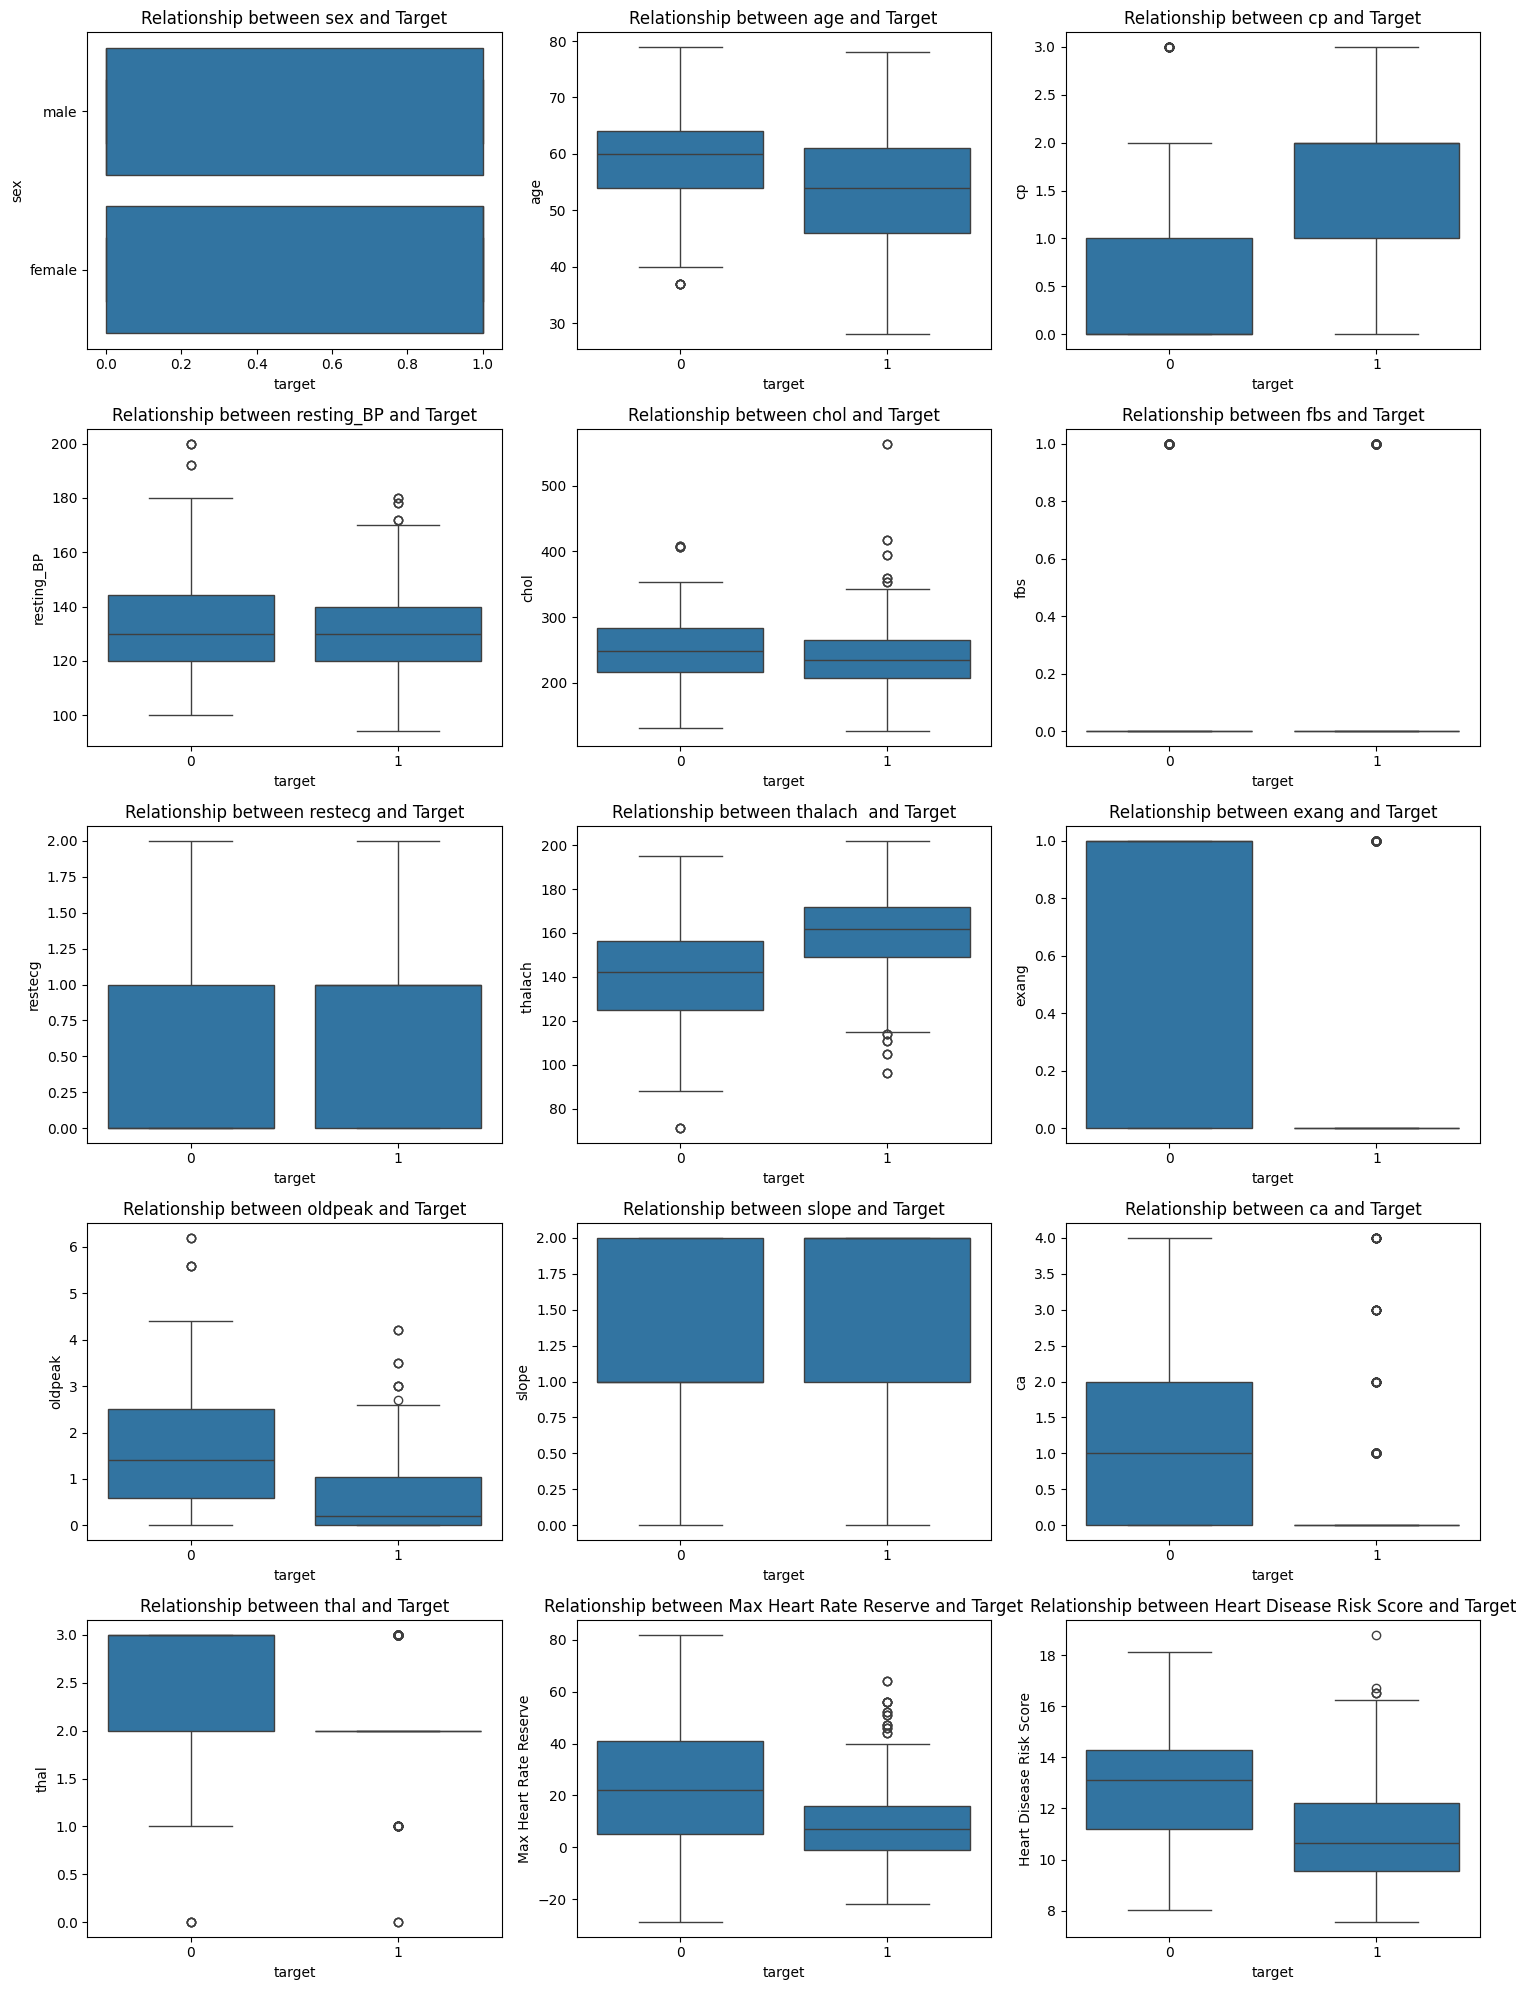

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot against the target variable
features = ['sex', 'age', 'cp', 'resting_BP', 'chol', 'fbs', 'restecg', 'thalach ', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Max Heart Rate Reserve', 'Heart Disease Risk Score']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Iterate through the features and create a boxplot for each
for i, feature in enumerate(features):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and Target')

# Remove any unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

In [4]:
# Encode categorical feature 'sex'
df['sex'] = LabelEncoder().fit_transform(df['sex'])

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Normalize all numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    # Initialize results dictionary with all metrics for each model
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }

In [6]:
# Convert updated results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T
results_df.sort_values(by=['Accuracy', 'F1 Score'], ascending=False, inplace=True)

# Display the updated results DataFrame
results_df

,Accuracy,F1 Score,Precision,Recall
Random Forest,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,0.985507,0.987755,1.000000,0.975806
Support Vector Classifier,0.893720,0.911290,0.911290,0.911290
Logistic Regression,0.850242,0.877470,0.860465,0.895161


In [7]:
import tensorflow as tf
from sklearn.metrics import f1_score

# Define the neural network model
dl_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = dl_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate on the test set
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype("int32")
dl_accuracy = accuracy_score(y_test, y_pred_dl)
dl_f1 = f1_score(y_test, y_pred_dl)

dl_accuracy, dl_f1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(0.9468599033816425, 0.9539748953974896)